In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 1\For absortion emission plot')
from scipy.signal import find_peaks

# Import Emission Data

In [2]:
df_emission = pd.read_table("test_meas.asc")
df_emission = df_emission.iloc[:-28] #only get data I want
#Convert index into wl
step_size = (682.54-483.56)/1599
current_wl = 483.56
wavelength = [] 
for i in range(1600):
    wavelength.append(current_wl)
    current_wl  =  current_wl+ step_size
wavelength[1599]
#Rename axis
df_emission.insert(0, "Wavelength", wavelength, allow_duplicates=False)
df_emission = df_emission.rename(columns= {"Range: 483.56 - 682.54": "Intensity"})

# Peak Pick Emission data

In [3]:
x= df_emission.Wavelength #Create an array of wl and intensity from df
y= df_emission.Intensity

peaks= find_peaks(y, height= 450, distance = 400) #peak pick
height = peaks[1]['peak_heights'] #get height
print(peaks)
peak_value = x[peaks[0]]
print(peak_value)
peak_value=peak_value.to_numpy().astype(float)

(array([ 381, 1245], dtype=int64), {'peak_heights': array([524., 904.])})
382     530.971745
1246    638.488143
Name: Wavelength, dtype: float64


# Import Absorbane

In [4]:
col = ["Wl","A"]
df_abs= pd.read_csv('doped azz.WDATA', sep=",", names=col)
df_abs = df_abs.iloc[40:,:]
array_abs= df_abs.to_numpy()
#print(array)
array_abs = array_abs.astype(np.float)
x_abs= array_abs[:,[0]]
x_abs= x_abs.transpose()
x_abs=x_abs[0]

y_abs= array_abs[:,[1]]
y_abs=y_abs.transpose()
y_abs=y_abs[0]

C:\Users\tselb\AppData\Local\Temp/ipykernel_11644/1576758481.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  array_abs = array_abs.astype(np.float)


# Peak Pick absorbance

In [5]:
peaks_abs = find_peaks(y_abs, height= 1, distance = 36, prominence=0.0000001) #peak pick
height_abs = peaks_abs[1]['peak_heights'] #get height

peak_abs_value = x_abs[peaks_abs[0]]
print(peak_abs_value)

[573.69 537.69 443.02]


# Plot

[530.97174484 638.48814259 573.69       537.69       443.02      ]
530.9717448405288
638.4881425891297
573.69
537.69
443.02


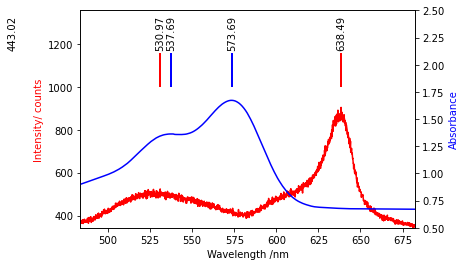

In [6]:
fig,ax = plt.subplots()
ax.set_xlabel('Wavelength /nm')
ax.set_ylabel('Intensity/ counts', color='r') #Plot excitation as red
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y)*1.5)
ax.plot(x,y, label='Excitation', color='r')
ax2=ax.twinx() #Clone the x axis to plot both abs and emission on the same graph
ax2.plot(x_abs,y_abs, color='b')  #Plot absorbance as blue
ax2.set_ylim([0.5,2.5])
ax2.set_ylabel('Absorbance', color='b')

all_peaks =np.concatenate([peak_value,peak_abs_value],axis =0)
print(all_peaks)
color=['r','r','b','b','b']
for i in range(len(all_peaks)): #print peaks and line onto graph- note the ymin/max is given in proportion to graph window not the values on the y axis
    print(all_peaks[i])
    ax.axvline(x=all_peaks[i], ymin= 0.65, ymax=0.8,linewidth=2, color=color[i])
    plt.text(all_peaks[i],2.15,str(round(all_peaks[i],2)),rotation=90,horizontalalignment='center')
plt.show()
#plt.savefig('absorbance and ext plot.png', dpi=1000)